In [1]:
import numpy as np
import sys
sys.path.insert(0, './../Libs/')
from pca import PCA
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
cancerData = load_breast_cancer()
scaler = MinMaxScaler()
scaler.fit(cancerData.data)
XScaled = scaler.transform(cancerData.data)

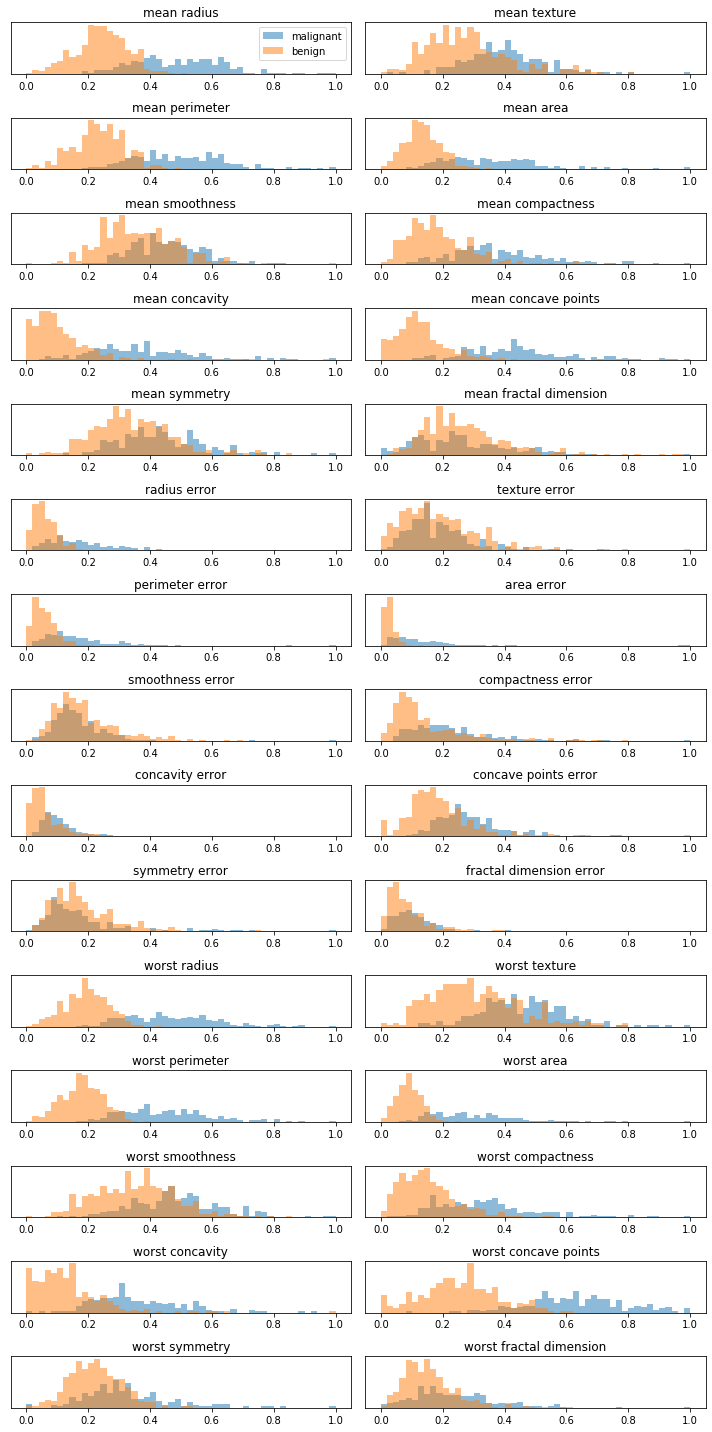

In [3]:
fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = XScaled[cancerData.target == 0]
benign = XScaled[cancerData.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(XScaled[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, alpha = 0.5)
    ax[i].hist(benign[:, i], bins = bins, alpha = 0.5)
    ax[i].set_title(cancerData.feature_names[i])
    ax[i].set_yticks(())
ax[0].legend(["malignant", "benign"], loc = "best")
fig.tight_layout()

In [4]:
pcaModel = PCA(XScaled).fit()
w = pcaModel.getw()
print(w.shape)

(30, 30)


In [5]:
wChosen = w[:, 0:30]
pcaData = XScaled.dot(wChosen)
print(pcaData[:, 0:5])

[[-0.70687182  0.3512156   0.21952134  0.48266753  0.15815246]
 [-0.77466847  0.4402259  -0.01518733  0.17095103  0.14728414]
 [-0.79197751  0.3433753  -0.0651454   0.26524435  0.27544036]
 ...
 [-0.69571601  0.3152143  -0.13833664  0.14243365  0.272626  ]
 [-1.01300656  0.4459904  -0.06320473  0.44642487  0.32859699]
 [-0.18601576  0.10044952 -0.10645154  0.08919869  0.23861492]]


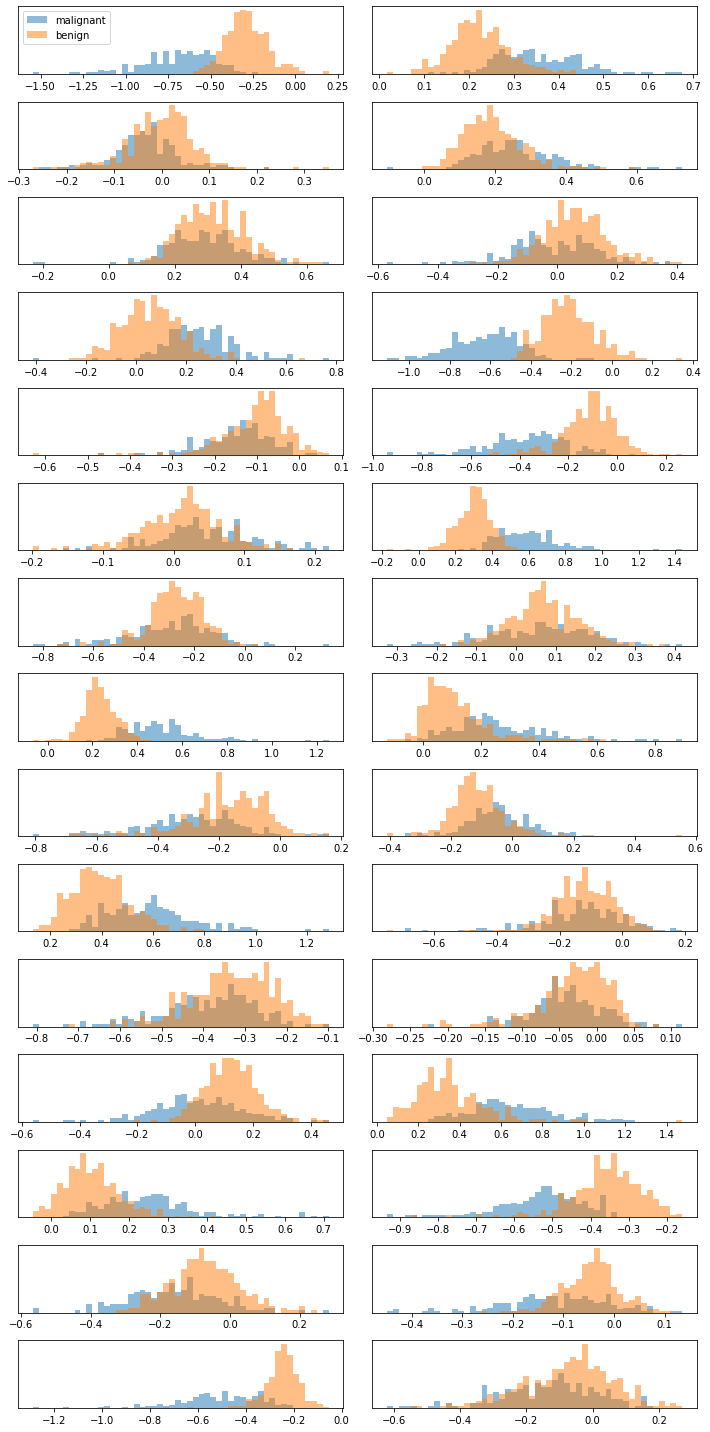

In [7]:
fig, axes = plt.subplots(15, 2, figsize = (10, 20))
malignant = pcaData[cancerData.target == 0]
benign = pcaData[cancerData.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(pcaData[:, i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, alpha = 0.5)
    ax[i].hist(benign[:, i], bins = bins, alpha = 0.5)
    ax[i].set_yticks(())
ax[0].legend(["malignant", "benign"], loc = "best")
fig.tight_layout()